In [1]:
from keras.datasets import imdb

In [2]:
top_words = 1000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=top_words)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)
print("X_test.shape: ", X_test.shape)
print("Y_test.shape: ", Y_test.shape)

X_train.shape:  (25000,)
Y_train.shape:  (25000,)
X_test.shape:  (25000,)
Y_test.shape:  (25000,)


In [4]:
print(X_train[0])
print(Y_train[0])


[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [5]:
from keras.preprocessing import sequence

In [6]:
max_words = 100
X_train = sequence.pad_sequences(X_train,
maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)

X_train.shape:  (25000, 100)
X_test.shape:  (25000, 100)


In [8]:
from keras.models import Sequential
from keras.layers import Embedding
top_words = 1000
max_words = 100

In [9]:
model = Sequential()
model.add(Embedding(top_words, 32,
input_length=max_words)) 

In [44]:
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU

In [23]:
model = Sequential()
model.add(Embedding(top_words, 32,
input_length=max_words))
model.add(Dropout(0.25))
model.add(SimpleRNN(32))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))

In [24]:
model.compile(loss="binary_crossentropy",
optimizer="rmsprop", metrics=["accuracy"])
history = model.fit(X_train, Y_train, validation_split=0.2,
epochs=5, batch_size=128, verbose=2)

Epoch 1/5
157/157 - 6s - loss: 0.6375 - accuracy: 0.6256 - val_loss: 0.5392 - val_accuracy: 0.7436
Epoch 2/5
157/157 - 4s - loss: 0.4718 - accuracy: 0.7853 - val_loss: 0.4999 - val_accuracy: 0.7562
Epoch 3/5
157/157 - 4s - loss: 0.4271 - accuracy: 0.8118 - val_loss: 0.5012 - val_accuracy: 0.7440
Epoch 4/5
157/157 - 4s - loss: 0.4044 - accuracy: 0.8278 - val_loss: 0.4679 - val_accuracy: 0.7904
Epoch 5/5
157/157 - 4s - loss: 0.3957 - accuracy: 0.8280 - val_loss: 0.5172 - val_accuracy: 0.7948


In [25]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

782/782 [==============================] - 3s 4ms/step - loss: 0.5100 - accuracy: 0.7915
測試資料集的準確度 = 0.79


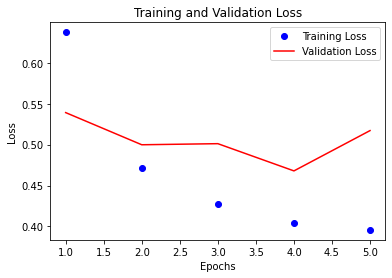

In [27]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

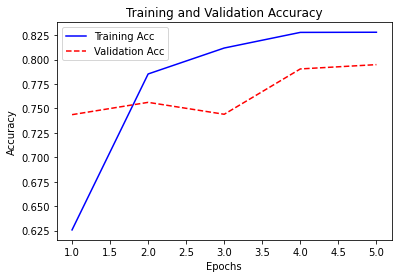

In [29]:
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [32]:
model = Sequential()
model.add(Embedding(top_words, 32,
input_length=max_words))
model.add(Dropout(0.25))
model.add(LSTM(32))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))

In [37]:
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])
history = model.fit(X_train, Y_train, validation_split=0.2,
epochs=5, batch_size=128, verbose=2)

Epoch 1/5
157/157 - 10s - loss: 0.5759 - accuracy: 0.6992 - val_loss: 0.4502 - val_accuracy: 0.7928
Epoch 2/5
157/157 - 9s - loss: 0.4273 - accuracy: 0.8105 - val_loss: 0.4242 - val_accuracy: 0.8092
Epoch 3/5
157/157 - 9s - loss: 0.3921 - accuracy: 0.8283 - val_loss: 0.4260 - val_accuracy: 0.8086
Epoch 4/5
157/157 - 9s - loss: 0.3793 - accuracy: 0.8349 - val_loss: 0.4177 - val_accuracy: 0.8122
Epoch 5/5
157/157 - 9s - loss: 0.3736 - accuracy: 0.8364 - val_loss: 0.3816 - val_accuracy: 0.8248


In [38]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))


782/782 [==============================] - 6s 8ms/step - loss: 0.3709 - accuracy: 0.8338
測試資料集的準確度 = 0.83


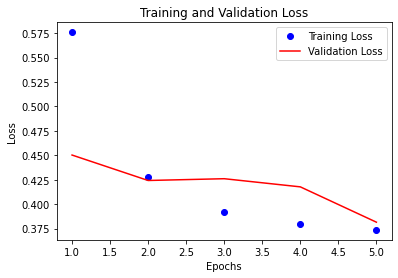

In [40]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

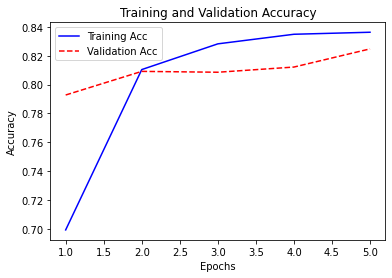

In [41]:
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [45]:
model = Sequential()
model.add(Embedding(top_words, 32,
input_length=max_words))
model.add(Dropout(0.25))
model.add(GRU(32, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))

In [46]:
model.compile(loss="binary_crossentropy",
optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, Y_train, validation_split=0.2,
epochs=5, batch_size=128, verbose=2)


Epoch 1/5
157/157 - 10s - loss: 0.6986 - accuracy: 0.5962 - val_loss: 0.6104 - val_accuracy: 0.6598
Epoch 2/5
157/157 - 9s - loss: 0.5696 - accuracy: 0.7061 - val_loss: 0.5161 - val_accuracy: 0.7726
Epoch 3/5
Epoch 4/5
157/157 - 9s - loss: 0.4114 - accuracy: 0.8195 - val_loss: 0.4245 - val_accuracy: 0.8034
Epoch 5/5
157/157 - 9s - loss: 0.3910 - accuracy: 0.8289 - val_loss: 0.4272 - val_accuracy: 0.8064


In [47]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

782/782 [==============================] - 6s 7ms/step - loss: 0.4155 - accuracy: 0.8113
測試資料集的準確度 = 0.81


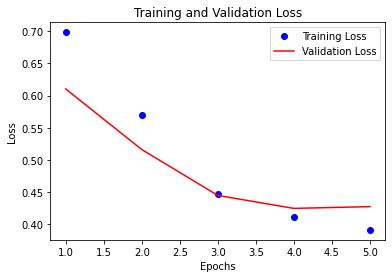

In [49]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

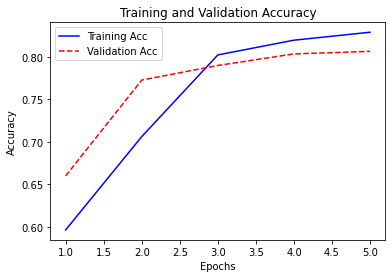

In [50]:
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()